In [ ]:
import tensorflow as tf
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import itertools
from keras.callbacks import LearningRateScheduler


print(tf.__version__)

2.7.0


In [ ]:
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 11s 0us/step


In [ ]:
y_train = y_train.flatten()
y_test = y_test.flatten()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[[Text(0, 0, 'airplane'),
  Text(0, 0, 'automobile'),
  Text(0, 0, 'bird'),
  Text(0, 0, 'cat'),
  Text(0, 0, 'deer'),
  Text(0, 0, 'dog'),
  Text(0, 0, 'frog'),
  Text(0, 0, 'horse'),
  Text(0, 0, 'ship'),
  Text(0, 0, 'truck')]]

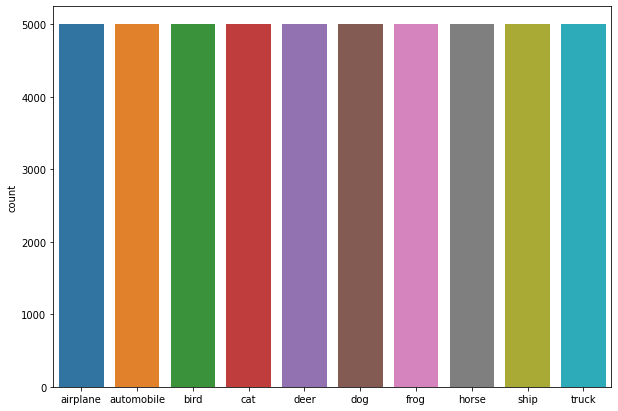

In [ ]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
#Xuất ra số lượng tấm ảnh trong mỗi class
plt.figure(figsize=(10,7))
p = sns.countplot(y_train.flatten())
p.set(xticklabels=classes)

In [ ]:
input_shape = (32, 32, 3)

x_train=x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 3)
x_train=x_train / 255.0
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 3)
x_test=x_test / 255.0

In [ ]:
Y_train = y_train
Y_test = y_test

In [ ]:
y_train = tf.one_hot(y_train.astype(np.int32), depth=10)
y_test = tf.one_hot(y_test.astype(np.int32), depth=10)

tf.Tensor([0. 0. 0. 0. 0. 0. 1. 0. 0. 0.], shape=(10,), dtype=float32)


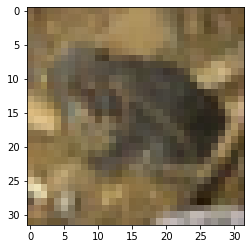

In [ ]:
plt.imshow(x_train[23])
print(y_train[23])

In [ ]:
def lr_schedule(epoch):
    lrate = 0.001
    if epoch > 75:
        lrate = 0.0005
    if epoch > 100:
        lrate = 0.0003
    if epoch > 125:
        lrate = 0.0001
    if epoch > 150:
        lrate = 0.00005
    if epoch > 175:
        lrate = 0.00001      
    return lrate
 

In [ ]:
#Feature Normalize 
mean = np.mean(x_train,axis=(0,1,2,3))
std = np.std(x_train,axis=(0,1,2,3))
x_train = (x_train-mean)/(std+1e-7)
x_test = (x_test-mean)/(std+1e-7)

In [ ]:
batch_size = 128
num_classes = 10
epochs = 200
weight_decay = 1e-4

In [ ]:
from keras import regularizers
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=x_train.shape[1:]),
    tf.keras.layers.Activation('elu'),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)),
    tf.keras.layers.Activation('elu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)),
    tf.keras.layers.Activation('elu'),
    tf.keras.layers.BatchNormalization(),


    tf.keras.layers.Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)),
    tf.keras.layers.Activation('elu'),
    tf.keras.layers.BatchNormalization(), 
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)), 
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)),
    tf.keras.layers.Activation('elu'),
    tf.keras.layers.BatchNormalization(),


    tf.keras.layers.Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)), 
    tf.keras.layers.Activation('elu'),  
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.4),

    tf.keras.layers.Conv2D(256, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)),
    tf.keras.layers.Activation('elu'),
    tf.keras.layers.BatchNormalization(),


    tf.keras.layers.Conv2D(256, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)), 
    tf.keras.layers.Activation('elu'),  
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.4),


    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes, activation='softmax'),
])

model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001, decay=1e-06),
            loss='categorical_crossentropy', metrics=['acc'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                        

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    )
datagen.fit(x_train)

In [ ]:
history = model.fit(datagen.flow(x_train, y_train, batch_size=batch_size),\
                    steps_per_epoch=x_train.shape[0] // batch_size,epochs=epochs,\
                    verbose=1,validation_data=(x_test,y_test),
                           callbacks=[LearningRateScheduler(lr_schedule)])

Epoch 1/200
390/390 [==============================] - 56s 114ms/step - loss: 2.4029 - acc: 0.3667 - val_loss: 1.8841 - val_acc: 0.5162 - lr: 0.0010
Epoch 2/200
390/390 [==============================] - 43s 110ms/step - loss: 1.7526 - acc: 0.5054 - val_loss: 1.3616 - val_acc: 0.5886 - lr: 0.0010
Epoch 3/200
390/390 [==============================] - 44s 112ms/step - loss: 1.5350 - acc: 0.5781 - val_loss: 1.2302 - val_acc: 0.6290 - lr: 0.0010
Epoch 4/200
390/390 [==============================] - 43s 110ms/step - loss: 1.4200 - acc: 0.6169 - val_loss: 1.3433 - val_acc: 0.6687 - lr: 0.0010
Epoch 5/200
390/390 [==============================] - 43s 111ms/step - loss: 1.2388 - acc: 0.6541 - val_loss: 1.2639 - val_acc: 0.6883 - lr: 0.0010
Epoch 6/200
390/390 [==============================] - 43s 110ms/step - loss: 1.1133 - acc: 0.6872 - val_loss: 1.2866 - val_acc: 0.7110 - lr: 0.0010
Epoch 7/200
390/390 [==============================] - 44s 112ms/step - loss: 1.0585 - acc: 0.7069 - val_l

In [ ]:
model.save_weights('model.h5') #Lưu model
#model.load_weights(latest) # load model 

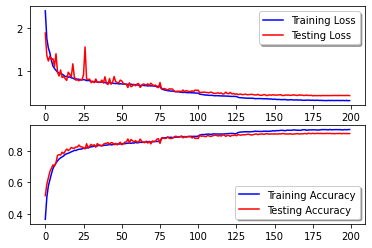

In [ ]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training Loss")
ax[0].plot(history.history['val_loss'], color='r', label="Testing Loss")
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training Accuracy")
ax[1].plot(history.history['val_acc'], color='r', label="Testing Accuracy")
legend = ax[1].legend(loc='best', shadow=True)


In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 5s 16ms/step - loss: 0.4228 - acc: 0.9094


In [ ]:
# Predict kết quả cho tập data test
y_pred = model.predict(x_test)
# Chuyển kết quả dự đoán sang "one hot vectors" 
y_pred_classes = np.argmax(y_pred,axis = 1) 
# Chuyển đổi kết quả (chính xác) sang dạng "one hot vectors" 
y_true = np.argmax(y_test,axis = 1)
# Tính toán  confusion matrix
confusion_mtx = tf.math.confusion_matrix(y_true, y_pred_classes)

In [ ]:
#Chuyển đổi lại giá trị các pixel lại 
x_train = x_train*(std+1e-7)+mean
x_test = x_test*(std+1e-7) + mean

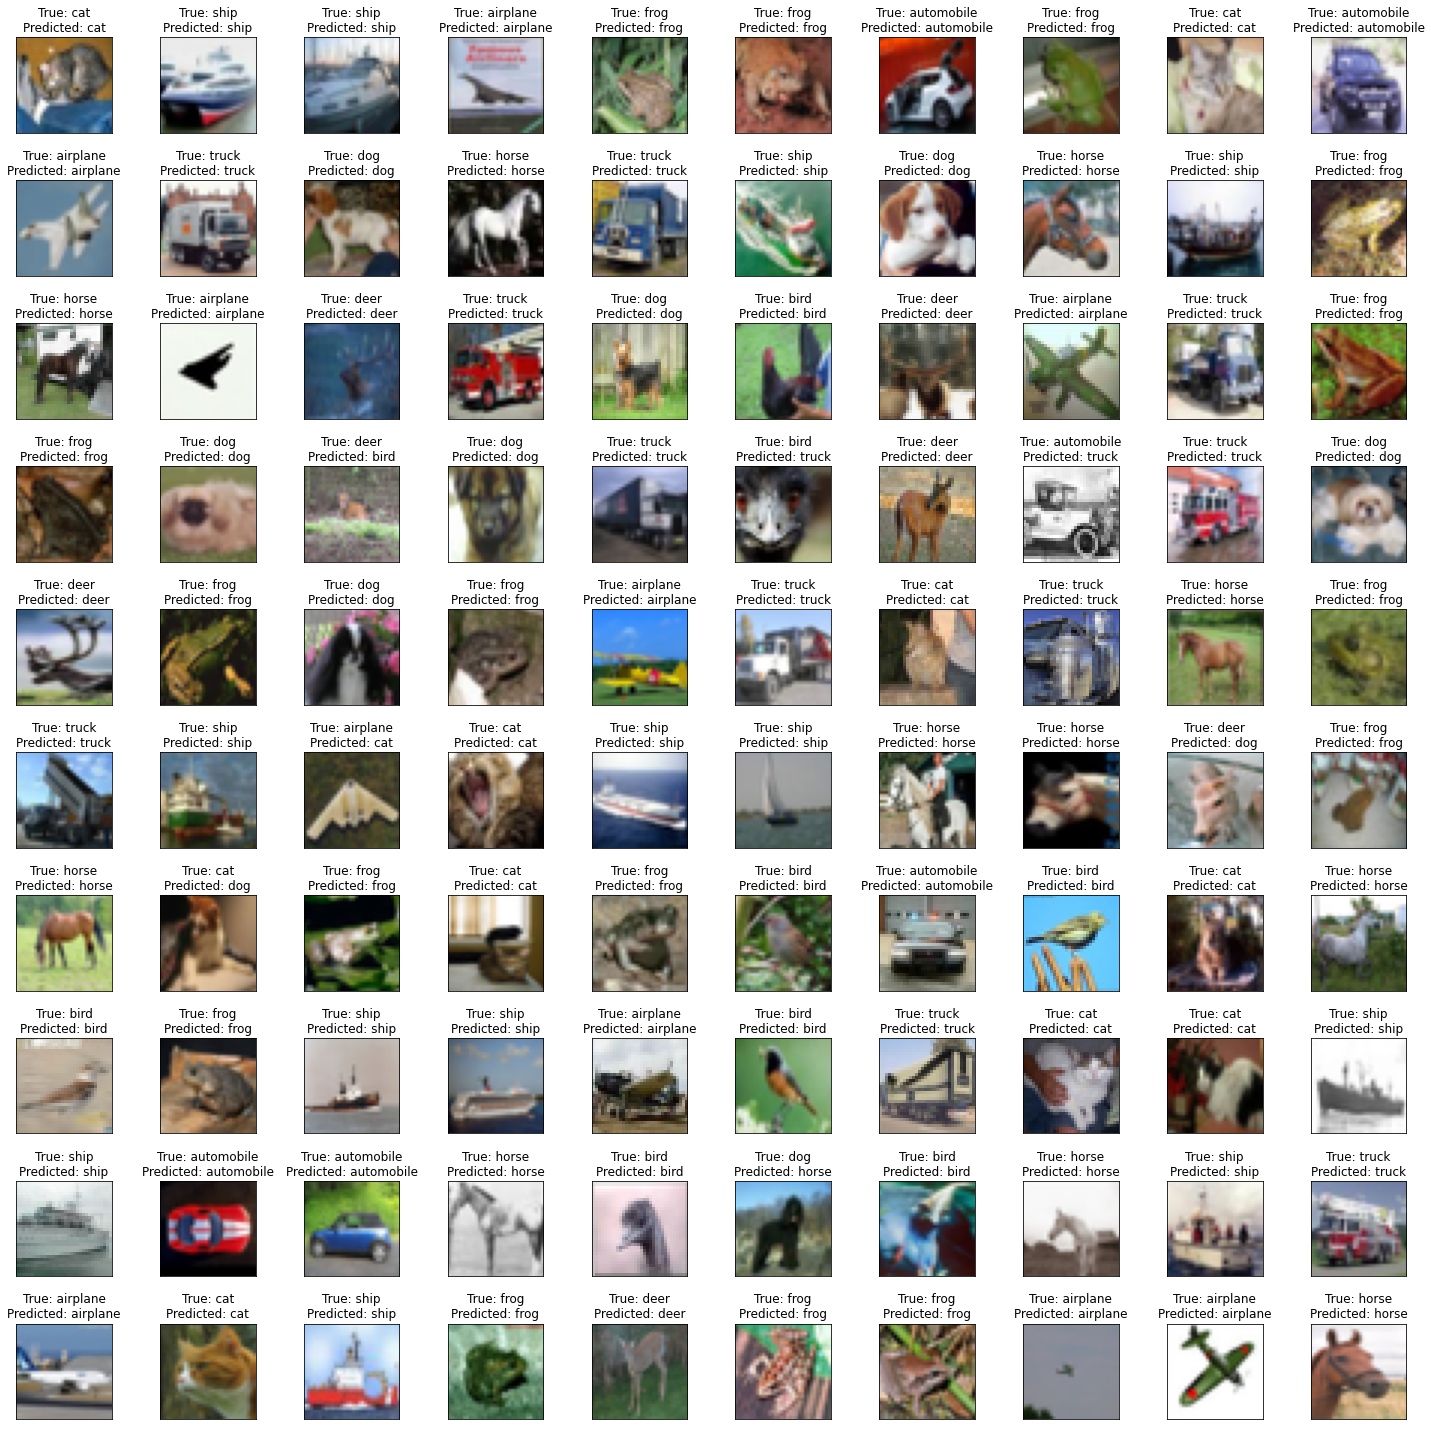

In [ ]:
# Hiển thị một số bức hình kèm theo kết quả dự đoán và kết quả thực 
fig, axes = plt.subplots(nrows=10, ncols=10, figsize=(20, 20),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(x_test[i])
    ax.set_title(f"True: {classes[Y_test[i]]}\nPredicted: {classes[y_pred_classes[i]]}")
plt.tight_layout()
plt.show()

[[Text(0, 0.5, 'airplane'),
  Text(0, 1.5, 'automobile'),
  Text(0, 2.5, 'bird'),
  Text(0, 3.5, 'cat'),
  Text(0, 4.5, 'deer'),
  Text(0, 5.5, 'dog'),
  Text(0, 6.5, 'frog'),
  Text(0, 7.5, 'horse'),
  Text(0, 8.5, 'ship'),
  Text(0, 9.5, 'truck')],
 [Text(0.5, 0, 'airplane'),
  Text(1.5, 0, 'automobile'),
  Text(2.5, 0, 'bird'),
  Text(3.5, 0, 'cat'),
  Text(4.5, 0, 'deer'),
  Text(5.5, 0, 'dog'),
  Text(6.5, 0, 'frog'),
  Text(7.5, 0, 'horse'),
  Text(8.5, 0, 'ship'),
  Text(9.5, 0, 'truck')]]

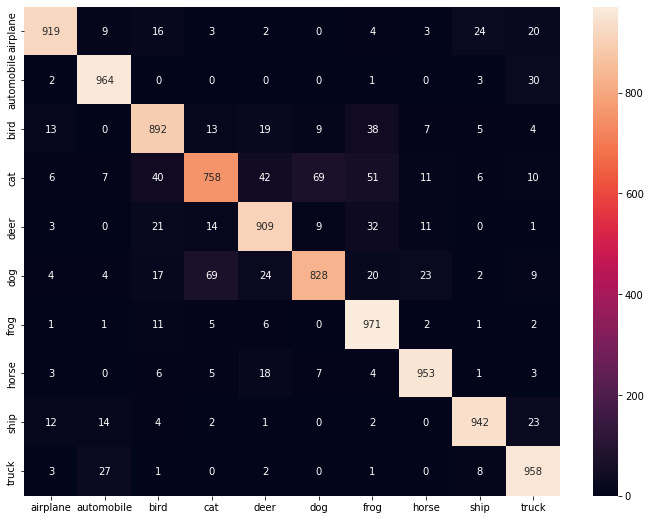

In [ ]:
plt.figure(figsize=(12, 9))
c = sns.heatmap(confusion_mtx, annot=True, fmt='g')
c.set(xticklabels=classes, yticklabels=classes)